In [4]:
from tensorflow.python.keras import Input
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import median_absolute_error, mean_absolute_percentage_error
from numpy import arange

In [5]:
from numpy.random import seed
seed(1)
from tensorflow import random, config
random.set_seed(1)
config.experimental.enable_op_determinism()
import random
random.seed(2)

There are 200 instances.
      TV  Sales
0  230.1   22.1
1   44.5   10.4
2   17.2    9.3
3  151.5   18.5
4  180.8   12.9


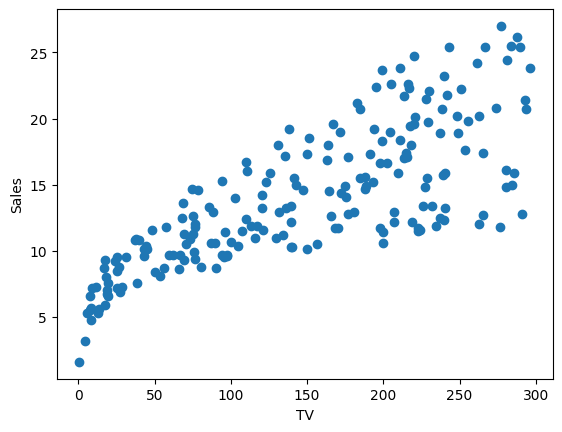

In [6]:
# Read dataset:
dataset = pd.read_csv('tvmarketing.csv')
print(f"There are {len(dataset.index)} instances.")
print(dataset.head())
plt.scatter(dataset['TV'], dataset['Sales'])
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

In [7]:
dataset.shape

(200, 2)

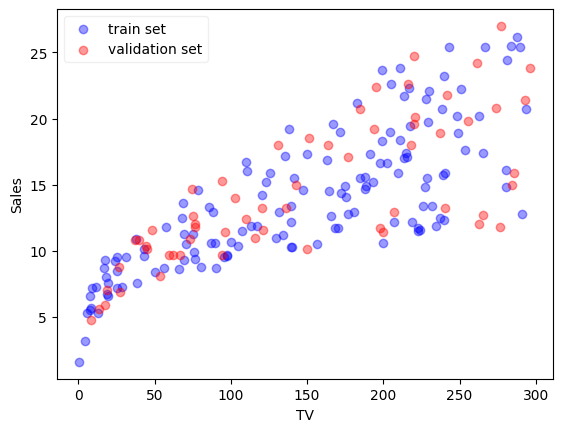

In [8]:
def split_dataset(dataset, train_frac=0.7):
    train = dataset.sample(frac=train_frac)
    val = dataset.drop(train.index)
    return train, val

# Split dataset into train and validation:
train, validation = split_dataset(dataset, train_frac=0.7)
plt.scatter(train['TV'], train['Sales'], c='blue', alpha=0.4)
plt.scatter(validation['TV'], validation['Sales'], c='red', alpha=0.4)
plt.xlabel('TV')
plt.ylabel('Sales')
plt.legend(['train set', 'validation set'], framealpha=0.3)
plt.show()

In [9]:
# Create model:
model = Sequential()
model.add(Input(shape=(1,)))
model.add(Dense(200, activation='sigmoid'))
model.add(Dense(200, activation='sigmoid'))
model.add(Dense(200, activation='sigmoid'))
model.add(Dense(1, activation='linear'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               400       
_________________________________________________________________
dense_1 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_2 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 201       
Total params: 81,001
Trainable params: 81,001
Non-trainable params: 0
_________________________________________________________________
None


In [10]:
# Train:
epochs = 1700
x_train, y_train = train['TV'], train['Sales']
x_val, y_val = validation['TV'], validation['Sales']  # Define and assign validation data

model.compile(loss='mse', optimizer='adam', metrics=['mae'])
history = model.fit(x_train, y_train, epochs=epochs, batch_size=64, verbose=1, validation_data=(x_val, y_val))

Epoch 1/1700
3/3 [==============================] - 1s 128ms/step - loss: 211.4698 - mae: 13.5899 - val_loss: 188.8657 - val_mae: 12.6961
Epoch 2/1700
3/3 [==============================] - 0s 21ms/step - loss: 167.3110 - mae: 11.8538 - val_loss: 148.7066 - val_mae: 11.0002
Epoch 3/1700
3/3 [==============================] - 0s 17ms/step - loss: 130.7827 - mae: 10.2112 - val_loss: 116.5766 - val_mae: 9.4310
Epoch 4/1700
3/3 [==============================] - 0s 16ms/step - loss: 101.5368 - mae: 8.7144 - val_loss: 92.5770 - val_mae: 8.1414
Epoch 5/1700
3/3 [==============================] - 0s 18ms/step - loss: 80.0181 - mae: 7.4915 - val_loss: 75.4706 - val_mae: 7.1469
Epoch 6/1700
3/3 [==============================] - 0s 20ms/step - loss: 65.1684 - mae: 6.5405 - val_loss: 63.6222 - val_mae: 6.3923
Epoch 7/1700
3/3 [==============================] - 0s 26ms/step - loss: 55.4387 - mae: 5.8869 - val_loss: 55.5804 - val_mae: 5.8314
Epoch 8/1700
3/3 [==============================] - 0s 2

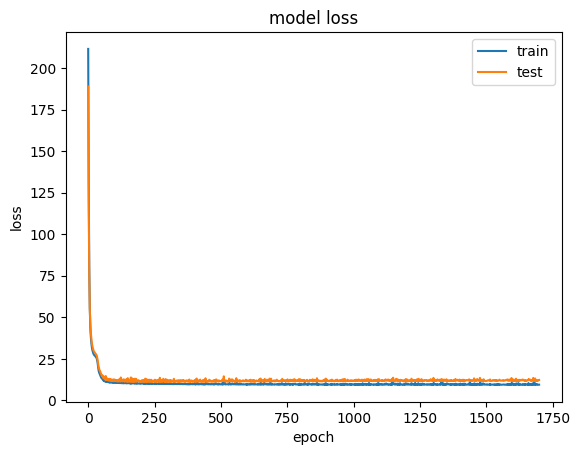

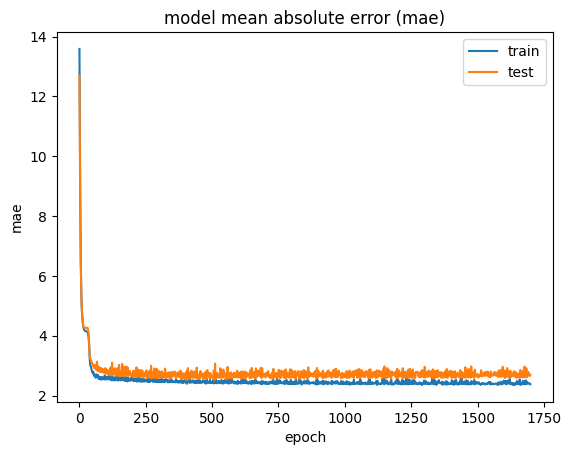

In [11]:
# Display loss:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# Display metric:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model mean absolute error (mae)')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [12]:

# Evaluate on test set:
test = pd.read_csv('tvmarketing.csv')
test_results = model.evaluate(test['TV'], test['Sales'], verbose=1)
print(f'Test set: - loss: {test_results[0]} - mae: {test_results[1]}')

7/7 [==============================] - 0s 3ms/step - loss: 10.2696 - mae: 2.4668
Test set: - loss: 10.269641876220703 - mae: 2.466801166534424


In [13]:
# Other metrics:
train_pred = model.predict(x_train)
val_pred = model.predict(validation['TV'])
test_pred = model.predict(test['Sales'])
print("Displaying other metrics:")
print("\t\tMedAE\tMAPE")
print(f"Train:\t{round(median_absolute_error(y_train, train_pred) ,3)}\t{round(mean_absolute_percentage_error(y_train, train_pred), 3)}")
print(f"Val  :\t{round(median_absolute_error(validation['Sales'], val_pred) ,3)}\t{round(mean_absolute_percentage_error(validation['Sales'], val_pred), 3)}")
print(f"Test :\t{round(median_absolute_error(test['Sales'], test_pred) ,3)}\t{round(mean_absolute_percentage_error(test['Sales'], test_pred), 3)}")

Displaying other metrics:
		MedAE	MAPE
Train:	1.897	0.17
Val  :	1.86	0.191
Test :	6.003	0.461


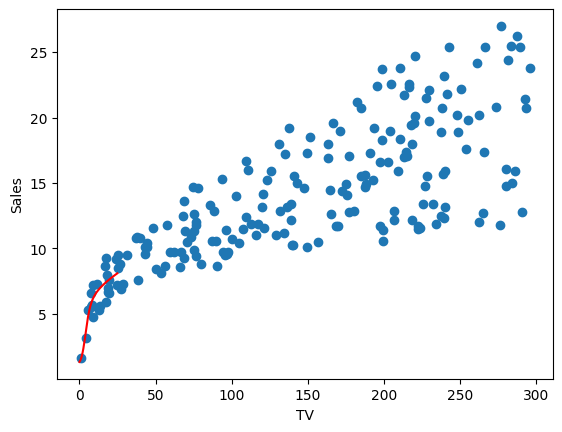

In [14]:
# Display function:
plt.scatter(dataset['TV'], dataset['Sales'])
x = arange(0, 25, 0.1).tolist()
plt.plot(x, model.predict(x), c='red')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()